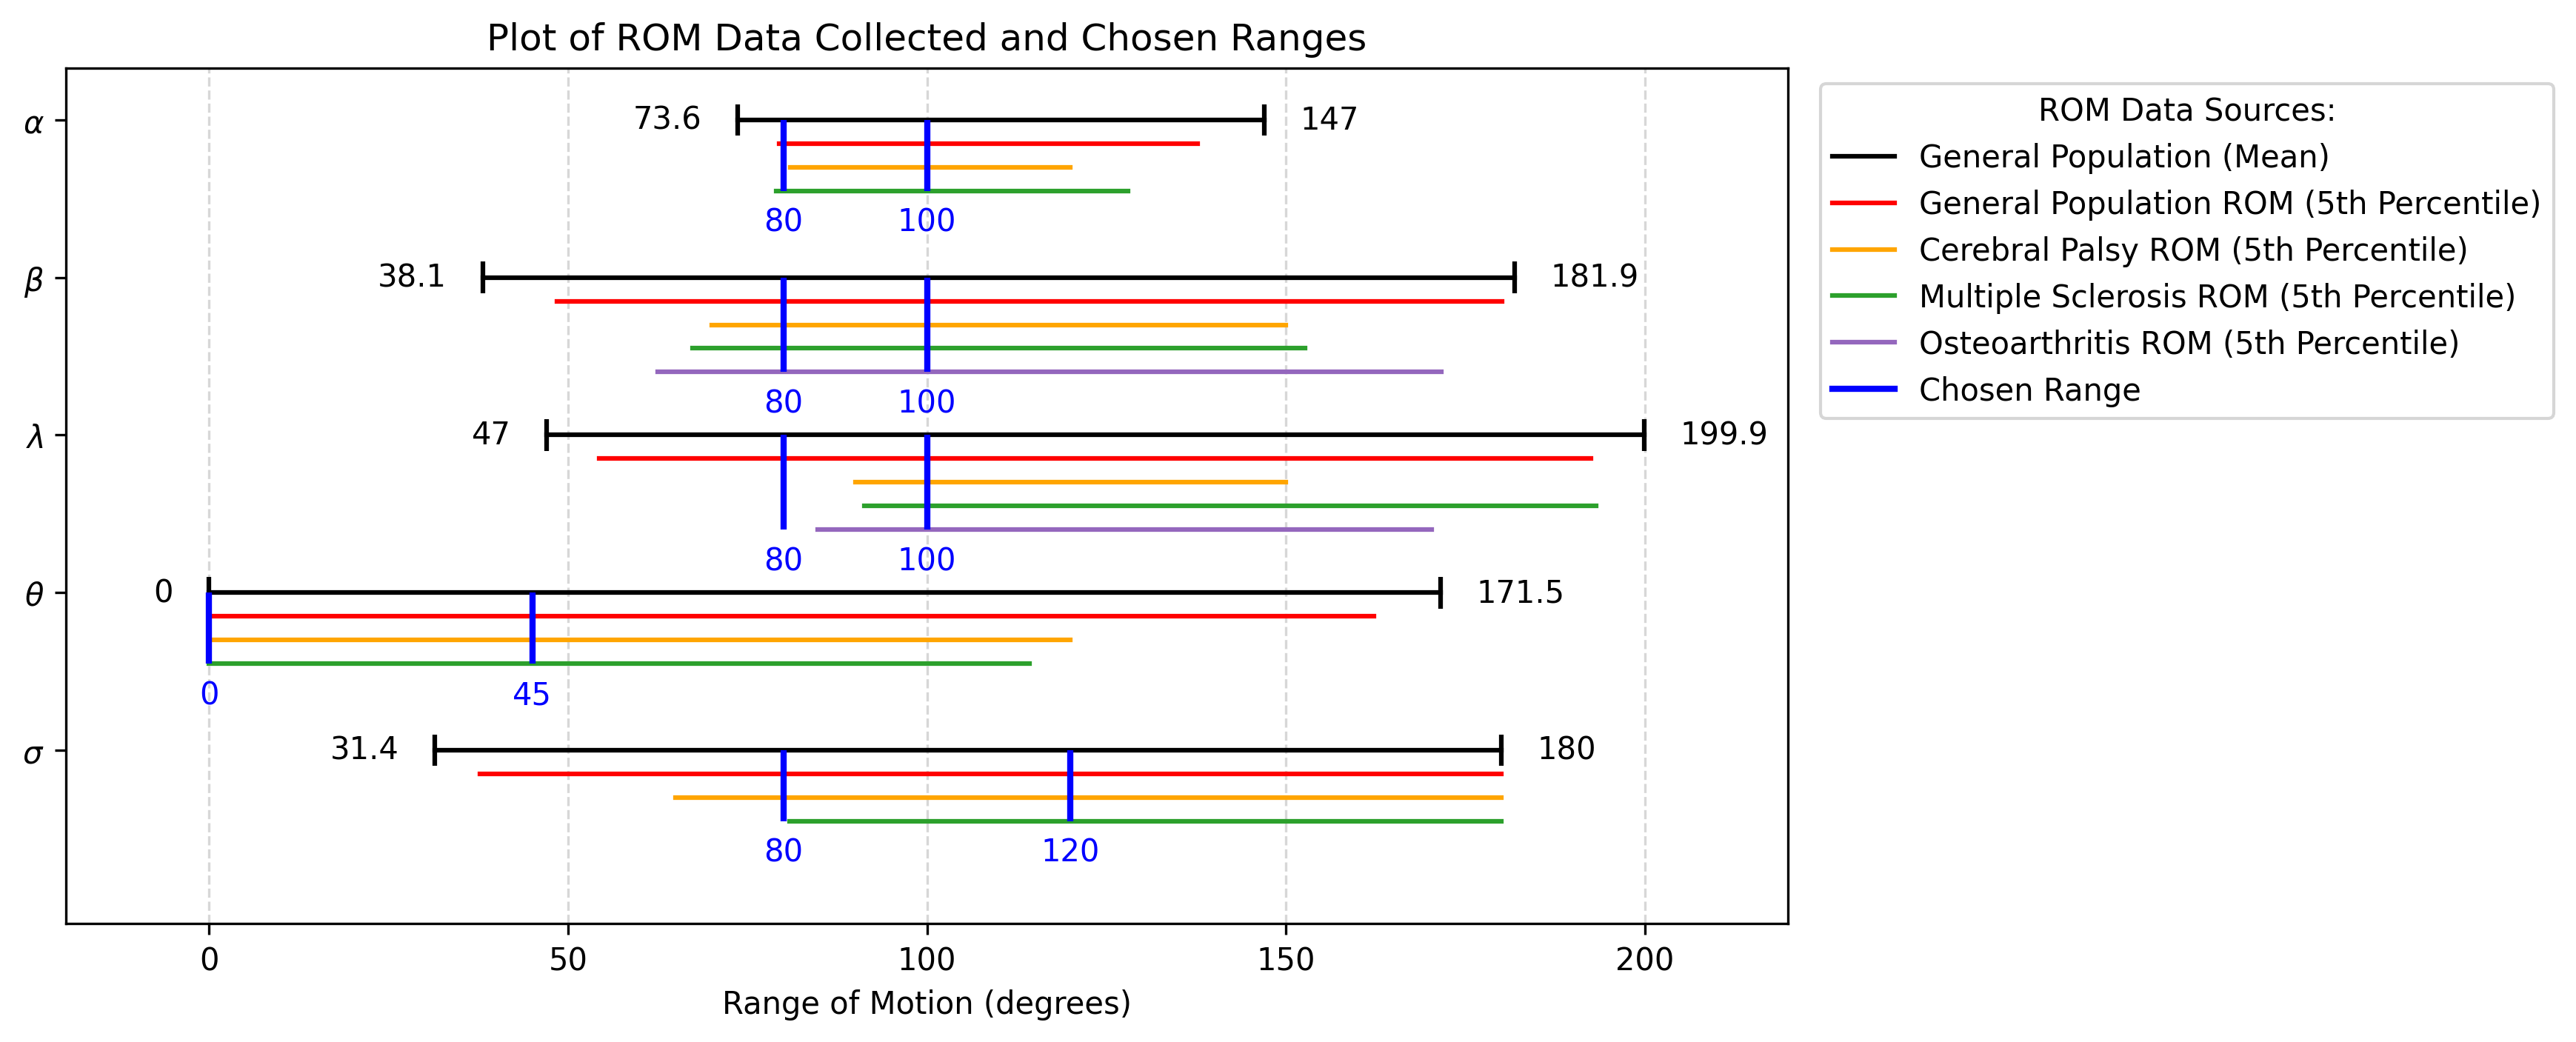

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D  # Import Line2D for legend entry

def plot_timeline_with_subranges(main_ranges, sub_ranges, third_set):

    # Increase DPI for high resolution
    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)  # Increase resolution with dpi=300

    # Define y-axis positions for each main line
    y_positions = list(range(len(main_ranges), 0, -1))  # Example: [5, 4, 3, 2, 1]

    # Define Greek symbols for y-axis labels
    greek_labels = [r"$\alpha$", r"$\beta$", r"$\lambda$", r"$\theta$", r"$\sigma$"]

    # Calculate the min and max values across all main ranges to set plot limits
    min_value = min(min_val for min_val, _ in main_ranges)
    max_value = max(max_val for _, max_val in main_ranges)

    # Add a margin of 20 units on both sides
    x_min = min_value - 20
    x_max = max_value + 20
    y_min = min_value - 0.1

    # Colors for main range and sub-range lines
    colors = ['red', 'orange', 'tab:green', 'tab:purple', 'grey']

    # Plot main timeline lines and sub-ranges as horizontal lines
    for i, (y, (min_val, max_val), (third_min, third_max)) in enumerate(zip(y_positions, main_ranges, third_set)):
        main_color = 'black'  # Color for the main range line
        
        # Draw the main horizontal line
        ax.plot([min_val, max_val], [y, y], color=main_color, linewidth=1.5)

        # Add vertical lines at the extreme ends of the main range **in the same color**
        ax.vlines([min_val, max_val], ymin=y - 0.1, ymax=y + 0.1, color=main_color, linewidth=1.5)

        # Add min/max labels for the main range
        ax.text(min_val - 5, y, f"{min_val}", verticalalignment='center', horizontalalignment='right', fontsize=10, color=main_color)
        ax.text(max_val + 5, y, f"{max_val}", verticalalignment='center', horizontalalignment='left', fontsize=10, color=main_color)

        # Plot sub-ranges as horizontal lines below the main range
        sub_spacing = 0.15  # Vertical spacing between sub-ranges
        for idx, (sub_min, sub_max) in enumerate(sub_ranges[i]):
            sub_y = y - (idx + 1) * sub_spacing  # Position below main line
            color = colors[idx] if idx < len(colors) else 'gray'  # Default color if more than 4 sub-ranges
            ax.plot([sub_min, sub_max], [sub_y, sub_y], color=color, linewidth=1.5)

        # Plot third dataset vertical lines extending through all sub-ranges
        vline_ymin = y - (len(sub_ranges[i]) * sub_spacing)  # Extend to cover all sub-ranges
        vline_ymax = y

        ax.vlines([third_min, third_max], ymin=vline_ymin, ymax=vline_ymax, color='blue', linewidth=2)

        # Move labels to the **bottom** of the vertical lines
        ax.text(third_min, vline_ymin - 0.1, f"{third_min}", verticalalignment='top', horizontalalignment='center', fontsize=10, color='blue')
        ax.text(third_max, vline_ymin - 0.1, f"{third_max}", verticalalignment='top', horizontalalignment='center', fontsize=10, color='blue')

    # Formatting
    ax.set_yticks(y_positions)
    ax.set_yticklabels(greek_labels)  # Greek symbols for Y-axis
    ax.set_xlabel("Range of Motion (degrees)")
    ax.set_title("Plot of ROM Data Collected and Chosen Ranges")
    ax.set_xlim(x_min, x_max)  # Set margins
    ax.set_ylim(y_min)  # Set margins
    ax.grid(axis='x', linestyle='--', alpha=0.5)

    # Custom legend
    legend_patches = [
        Line2D([0], [0], color='black', linewidth=1.5, label="General Population (Mean)"),
        Line2D([0], [0], color='red', linewidth=1.5, label="General Population ROM (5th Percentile)"),
        Line2D([0], [0], color='orange', linewidth=1.5, label="Cerebral Palsy ROM (5th Percentile)"),
        Line2D([0], [0], color='tab:green', linewidth=1.5, label="Multiple Sclerosis ROM (5th Percentile)"),
        Line2D([0], [0], color='tab:purple', linewidth=1.5, label="Osteoarthritis ROM (5th Percentile)"),
        Line2D([0], [0], color='blue', linewidth=2, linestyle='-', label="Chosen Range")
    ]
    
    # Adjust the legend position to be **closer to the plot but still outside**
    ax.legend(handles=legend_patches, title="ROM Data Sources:", loc="upper left", bbox_to_anchor=(1.01, 1))

    plt.show()

# Example input
main_ranges = [(73.6, 147), (38.1, 181.9), (47, 199.9), (0, 171.5), (31.4, 180)]  # Main timeline ranges
sub_ranges = [
    [(79.4, 137.7), (81, 120), (79, 128)],                     # Sub-ranges for Set 1
    [(48.4, 180.1), (70, 150), (67.3, 152.7), (62.5, 171.6)],  # Sub-ranges for Set 2
    [(54.3, 192.5), (90, 150), (91.3, 193.26), (84.8, 170.3)], # Sub-ranges for Set 3
    [(0, 162.3), (0, 120), (0, 114.3)],                        # Sub-ranges for Set 4
    [(37.7, 180), (65, 180), (80.9, 180)]                      # Sub-ranges for Set 5
]
third_set = [
    (80, 100),  # Third dataset min/max for Set 1
    (80, 100),  # Third dataset min/max for Set 2
    (80, 100),  # Third dataset min/max for Set 3
    (0, 45),    # Third dataset min/max for Set 4
    (80, 120)   # Third dataset min/max for Set 5
]

# Call function to plot
plot_timeline_with_subranges(main_ranges, sub_ranges, third_set)